In [1]:
# Class IT-533 Week #9  - Clustering
# Summer 2020
# Lab #8 - ramen-ratings.csv
# By Wei Geng(David) and Anusha Bale
# Created on: 07/12/2020
# Honor Code: “I have neither given or received, nor have I tolerated others' use of unauthorized aid.”

In [2]:
# install pandas in case you dont have pandas, matplotlib and sklearn pre-installed
%pip install pandas
%pip install matplotlib
%pip sklearn

In [3]:
# Convert to pandas DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
remen_df = pd.read_csv('https://raw.githubusercontent.com/intelspeedstep/AMOD533/master/ramen-ratings.csv')
remen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
# output the data attributes and its datatypes, plus the shape of the dataset
print(remen_df.info(verbose=True))
print(remen_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB
None
(2580, 7)


In [5]:
# Convert Stars from object to numberic and Review # to str since ID number usually has no analytical value
remen_df.loc[remen_df["Stars"]=='Unrated','Stars']=np.nan
remen_df['Stars']=remen_df['Stars'].astype(float)
# remen_df['Review #']=remen_df['Review #'].astype(str)

### <font color = 'orange'> Model: kMeans </font>
</font></br>

In [6]:
# Convert the string variables to numeric categorical varibles, so the model can run. Sklearn classifers requires categorical variables to be numerically coded.
from sklearn.preprocessing import LabelEncoder
remen_df["Brand"] = LabelEncoder().fit_transform(remen_df["Brand"])
remen_df["Variety"] = LabelEncoder().fit_transform(remen_df["Variety"])
remen_df["Style"] = LabelEncoder().fit_transform(remen_df["Style"].astype(str))
remen_df["Country"] = LabelEncoder().fit_transform(remen_df["Country"])
remen_df["Top Ten"] = LabelEncoder().fit_transform(remen_df["Top Ten"].astype(str))
remen_df.fillna(remen_df.mean(),inplace=True)
remen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,190,2189,4,18,3.75,38
1,2579,119,1443,5,32,1.00,38
2,2578,192,454,4,35,2.25,38
3,2577,336,709,5,32,2.75,38
4,2576,38,1954,5,16,3.75,38


In [7]:
# fit the model with K from range 1 to 10, then output the inertia
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(remen_df)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

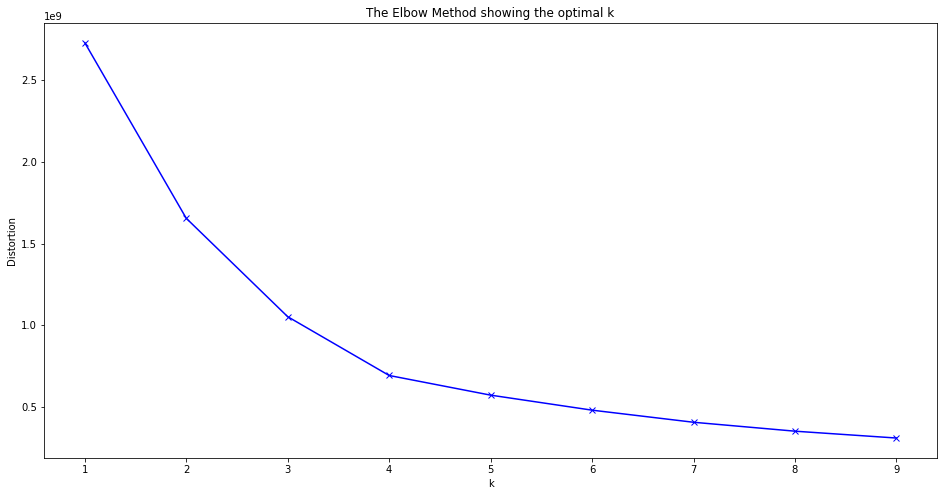

In [8]:
# plot the distortions vs K-value.
# from the graph, we see the elbow point is at k=4
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [9]:
# fit a k means models with k=4 and output the centriods for the 4 clusters
# however, we can not visualize the clusters since we have more than 3 dimensions in the dataset.
kmeanModel = KMeans(n_clusters=4).fit(remen_df)
centroids = kmeanModel.cluster_centers_
print(centroids)

[[ 627.46178344  181.2866242  1855.00477707    4.12579618   26.00318471
     3.47488057   37.38535032]
 [1962.33333333  182.98962963  632.72888889    4.19851852   22.45777778
     3.844        37.87111111]
 [ 638.86813187  195.16012559  560.74725275    4.03924647   26.11459969
     3.44336735   37.58084772]
 [1881.109375    174.259375   1780.003125      4.0859375    22.2
     3.84174067   37.8203125 ]]


In [10]:
# output the K-means model labels as we see, 0,1,2 and 4.
import numpy as np
print(np.unique(kmeanModel.labels_,return_counts=True))

(array([0, 1, 2, 3], dtype=int32), array([628, 674, 637, 641]))


In [11]:
# I output the label of each data point
kmeans_4=pd.DataFrame(kmeanModel.labels_,columns=['cluster'])
print(kmeans_4.cluster.value_counts())
kmeans_4.head(10)

1    674
3    641
2    637
0    628
Name: cluster, dtype: int64


,cluster
0,3
1,3
2,1
3,1
4,3
5,1
6,3
7,3
8,1
9,3


In [12]:
#  We cannot visualize a K-mean has more than 3 dimensions, we have 4 here. 
# So, we need to do feature reduction to reduce to 2 dimensions which we can visualize the cluster.
# I would use PCA to reduce the dimension to 2 dimension
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(remen_df)
pca_trans=pca.transform(remen_df)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])
kmeans_4=pd.concat([kmeans_4,pca_trans_df], axis=1)
kmeans_4.head()

,cluster,pca1,pca2
0,3,-1014.933715,1271.281043
1,3,-1192.845666,547.142788
2,1,-1427.631666,-413.909404
3,1,-1364.477956,-167.506438
4,3,-1068.535038,1043.159127


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


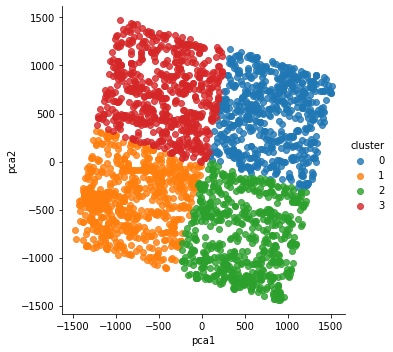

In [13]:
# use seaborn to visualize the cluster with PCA 
import seaborn as sns
fig=sns.lmplot(x='pca1',y='pca2',data=kmeans_4,hue='cluster',fit_reg=False)
plt.show()

### <font color = 'orange'> Model: Hierarchical Clusterer</font>
</font></br>

[1 1 1 ... 0 0 0]


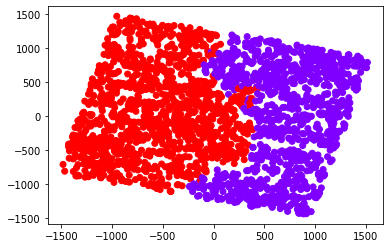

In [14]:
# we can use the the AgglomerativeClustering() from the sklearn to build a ierarchical Clusterer
# to visualize it, we need to again to reduce the dimensions to 2, and we need to use PCA to achieve it 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(remen_df)
print(cluster.labels_)
plt.scatter(pca_trans_df['pca1'],pca_trans_df['pca2'], c=cluster.labels_, cmap='rainbow')

### <font color = 'orange'>Model: DBScan</font>

In [15]:
# fit the DBScan model with eps = 0.05 and make the min sample size =2
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(algorithm='auto', eps=0.05, min_samples=2)
dbscan.fit(remen_df)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [16]:
# output the DBScan model labels as we see, there are 0 label, meaning the DBScan can not find any cluster in this dataset.
import numpy as np
print(np.unique(dbscan.labels_,return_counts=True))

(array([-1]), array([2580]))


In [17]:
# I output the label of each data point
# -1 means there is no clusters that the algorithm can find.
dbscan_df=pd.DataFrame(dbscan.labels_,columns=['cluster'])
print(dbscan_df.cluster.value_counts())
dbscan_df.head(10)

-1    2580
Name: cluster, dtype: int64


,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


**Note: Please check the attached Word Document for the answers for this week's lab assignment questions. Thanks**

### <font color = 'orange'>------------------------------------------------------------------------END--------------------------------------------------------------------------------- </font>